In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [2]:
data=pd.read_csv('All_flights.csv')  # read the data
data

,Unnamed: 0.1,Unnamed: 0,Flight_Name,Departure,Departure_Place,Arrival,Arrival_Destination,Total_Stops,Duration,Price
0,0,0,IndiGo,15:10,New Delhi,00:05,Bengaluru,1 stop via Hyderabad,08 h 55 m\n1 stop via Hyderabad,"₹ 5,988"
1,1,1,Go First,05:45,New Delhi,08:35,Bengaluru,Non stop,02 h 50 m\nNon stop,"₹ 7,107"
2,2,2,Vistara,05:35,New Delhi,08:30,Bengaluru,Non stop,02 h 55 m\nNon stop,"₹ 7,184"
3,3,3,IndiGo,19:45,New Delhi,01:10,Bengaluru,1 stop via Hyderabad,05 h 25 m\n1 stop via Hyderabad,"₹ 7,487"
4,4,4,IndiGo,05:55,New Delhi,08:45,Bengaluru,Non stop,02 h 50 m\nNon stop,"₹ 7,499"
...,...,...,...,...,...,...,...,...,...,...
1713,1713,145,AKASA AIR,20:50,Chennai,22:50,Mumbai,non-stop,2hr,2910
1714,1714,146,INDIGO,22:25,Chennai,00:20,Mumbai,non-stop,1hr 55min,2914
1715,1715,147,AIRASIA INDIA,06:55,Chennai,21:00,Mumbai,1 stop,14hr 5min,3149
1716,1716,148,INDIGO,08:30,Chennai,10:20,Mumbai,non-stop,1hr 50min,3400


# Dimensions of Dataset

In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 


(1718, 10)
Unnamed: 0.1             0
Unnamed: 0               0
Flight_Name            102
Departure                0
Departure_Place         99
Arrival                  0
Arrival_Destination     46
Total_Stops              0
Duration                 0
Price                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0.1         1718 non-null   int64 
 1   Unnamed: 0           1718 non-null   int64 
 2   Flight_Name          1616 non-null   object
 3   Departure            1718 non-null   object
 4   Departure_Place      1619 non-null   object
 5   Arrival              1718 non-null   object
 6   Arrival_Destination  1672 non-null   object
 7   Total_Stops          1718 non-null   object
 8   Duration             1718 non-null   object
 9   Price                1718 non-null   object
dtypes: int

As we see the null values are present in the dataset. 

In [4]:
# Drop unneccesary column
data=data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [5]:
data.head(3)

,Flight_Name,Departure,Departure_Place,Arrival,Arrival_Destination,Total_Stops,Duration,Price
0,IndiGo,15:10,New Delhi,00:05,Bengaluru,1 stop via Hyderabad,08 h 55 m\n1 stop via Hyderabad,"₹ 5,988"
1,Go First,05:45,New Delhi,08:35,Bengaluru,Non stop,02 h 50 m\nNon stop,"₹ 7,107"
2,Vistara,05:35,New Delhi,08:30,Bengaluru,Non stop,02 h 55 m\nNon stop,"₹ 7,184"


In [6]:
#first remove duplicates & recheck the size
data.drop_duplicates(inplace=True)

print(data.shape)

(1309, 8)


From above counting or shape we see there are duplicates are presents that we removed

# Statistical Summary

In [7]:
# Lets understand data at high level check the stastics of dataset
data.describe()

,Flight_Name,Departure,Departure_Place,Arrival,Arrival_Destination,Total_Stops,Duration,Price
count,1215,1309,1218,1309,1265,1309,1309,1309
unique,42,240,6,291,21,15,424,511
top,Vistara,07:10,Hyderabad,21:20,New Delhi,1 Stop,2h 15m,₹15078
freq,252,48,334,40,375,614,33,38


Observations: 1) null vallues are present 2)we have categorical data type(object type)

# EDA

# Data Pre-Processing

In [8]:
#Converting all capital letter into small letters
for i in data:
    data[i] =data[i].str.lower()
data

,Flight_Name,Departure,Departure_Place,Arrival,Arrival_Destination,Total_Stops,Duration,Price
0,indigo,15:10,new delhi,00:05,bengaluru,1 stop via hyderabad,08 h 55 m\n1 stop via hyderabad,"₹ 5,988"
1,go first,05:45,new delhi,08:35,bengaluru,non stop,02 h 50 m\nnon stop,"₹ 7,107"
2,vistara,05:35,new delhi,08:30,bengaluru,non stop,02 h 55 m\nnon stop,"₹ 7,184"
3,indigo,19:45,new delhi,01:10,bengaluru,1 stop via hyderabad,05 h 25 m\n1 stop via hyderabad,"₹ 7,487"
4,indigo,05:55,new delhi,08:45,bengaluru,non stop,02 h 50 m\nnon stop,"₹ 7,499"
...,...,...,...,...,...,...,...,...
1593,akasa air,20:50,chennai,22:50,mumbai,non-stop,2hr,2910
1594,indigo,22:25,chennai,00:20,mumbai,non-stop,1hr 55min,2914
1595,airasia india,06:55,chennai,21:00,mumbai,1 stop,14hr 5min,3149
1596,indigo,08:30,chennai,10:20,mumbai,non-stop,1hr 50min,3400


In [9]:
# lets check the count for stops
data['Total_Stops'].value_counts()

1 stop                  636
non stop                484
2 stop                  133
non-stop                 35
1 stop via hyderabad      6
2 stop(s)                 6
1 stop via bhopal         2
1 stop via nagpur         2
1 stop via mumbai         1
1 stop via ahmedabad      1
1 stop via lucknow        1
1 stop via goa            1
1 stop via shirdi         1
Name: Total_Stops, dtype: int64

In [10]:
data['Total_Stops']=data['Total_Stops'].str.replace('1 stop via hyderabad','1 stop')
data['Total_Stops']=data['Total_Stops'].str.replace('1 stop via bhopal','1 stop')
data['Total_Stops']=data['Total_Stops'].str.replace('1 stop via nagpur','1 stop')
data['Total_Stops']=data['Total_Stops'].str.replace('1 stop via mumbai','1 stop')
data['Total_Stops']=data['Total_Stops'].str.replace('1 stop via ahmedabad','1 stop')
data['Total_Stops']=data['Total_Stops'].str.replace('1 stop via lucknow','1 stop')
data['Total_Stops']=data['Total_Stops'].str.replace('1 stop via goa','1 stop')
data['Total_Stops']=data['Total_Stops'].str.replace('1 stop via shirdi','1 stop')
data['Total_Stops']=data['Total_Stops'].str.replace('non-stop','non stop')

In [11]:
data['Total_Stops']=data['Total_Stops'].replace("2 stop(s)","2 stop")

In [12]:
# lets check the count for stops again 
data['Total_Stops'].value_counts()

1 stop      651
non stop    519
2 stop      139
Name: Total_Stops, dtype: int64

In [13]:
# Replaceing ',' and '₹' by using pandas string method
data['Price']=data['Price'].str.replace(',','')
data['Price']=data['Price'].str.replace('₹','')

In [14]:
#Recheck the column values
data['Price']=data['Price'].astype('float')

In [15]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
Dep_Time_hours=[] # empty list
Dep_Time_minutes=[] # empty list
for i in data['Departure']:
    hour, minute = i.split(':')
    Dep_Time_hours.append(int(hour)) # Extracting Hours
    Dep_Time_minutes.append(int(minute)) # Extracting minutes

# adding this list as column to our dataset & drop the Dep_Time columns
data['Dep_Time_hours']=Dep_Time_hours
data['Dep_Time_minutes']=Dep_Time_minutes
data=data.drop(columns=["Departure"],axis=1)
data.head(3)

,Flight_Name,Departure_Place,Arrival,Arrival_Destination,Total_Stops,Duration,Price,Dep_Time_hours,Dep_Time_minutes
0,indigo,new delhi,00:05,bengaluru,1 stop,08 h 55 m\n1 stop via hyderabad,5988.0,15,10
1,go first,new delhi,08:35,bengaluru,non stop,02 h 50 m\nnon stop,7107.0,5,45
2,vistara,new delhi,08:30,bengaluru,non stop,02 h 55 m\nnon stop,7184.0,5,35


In [16]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

Arv_Time_hours=[] # empty list
Arv_Time_minutes=[] # empty list
for i in data['Arrival']:
    hour, minute = i.split(':')
    Arv_Time_hours.append(int(hour)) # Extracting Hours
    Arv_Time_minutes.append(minute) # Extracting minutes

# adding this list as column to our dataset & drop the Dep_Time columns
data['Arv_Time_hours']=Arv_Time_hours
data['Arv_Time_minutes']=Arv_Time_minutes
data=data.drop(columns=["Arrival"],axis=1)
data.head(3)

,Flight_Name,Departure_Place,Arrival_Destination,Total_Stops,Duration,Price,Dep_Time_hours,Dep_Time_minutes,Arv_Time_hours,Arv_Time_minutes
0,indigo,new delhi,bengaluru,1 stop,08 h 55 m\n1 stop via hyderabad,5988.0,15,10,0,05
1,go first,new delhi,bengaluru,non stop,02 h 50 m\nnon stop,7107.0,5,45,8,35
2,vistara,new delhi,bengaluru,non stop,02 h 55 m\nnon stop,7184.0,5,35,8,30


In [17]:
# As we dropduplicates ann remove unneccesary data lets reset the index first 
data.reset_index(inplace=True)

In [18]:
data

,index,Flight_Name,Departure_Place,Arrival_Destination,Total_Stops,Duration,Price,Dep_Time_hours,Dep_Time_minutes,Arv_Time_hours,Arv_Time_minutes
0,0,indigo,new delhi,bengaluru,1 stop,08 h 55 m\n1 stop via hyderabad,5988.0,15,10,0,05
1,1,go first,new delhi,bengaluru,non stop,02 h 50 m\nnon stop,7107.0,5,45,8,35
2,2,vistara,new delhi,bengaluru,non stop,02 h 55 m\nnon stop,7184.0,5,35,8,30
3,3,indigo,new delhi,bengaluru,1 stop,05 h 25 m\n1 stop via hyderabad,7487.0,19,45,1,10
4,4,indigo,new delhi,bengaluru,non stop,02 h 50 m\nnon stop,7499.0,5,55,8,45
...,...,...,...,...,...,...,...,...,...,...,...
1304,1593,akasa air,chennai,mumbai,non stop,2hr,2910.0,20,50,22,50
1305,1594,indigo,chennai,mumbai,non stop,1hr 55min,2914.0,22,25,0,20
1306,1595,airasia india,chennai,mumbai,1 stop,14hr 5min,3149.0,6,55,21,00
1307,1596,indigo,chennai,mumbai,non stop,1hr 50min,3400.0,8,30,10,20


In [19]:
#Droppng the duoble index column
data.drop(columns='index', inplace=True)

In [20]:
# While doing the EDA we seen there are some unique values are prsent in the Arival time minute so lets check and deal with it first 
data['Arv_Time_minutes'].unique()

array(['05', '35', '30', '10', '45', '55', '20', '40', '25', '15', '00',
       '50', '50\n+ 1 day', '15\n+ 1 day', '45\n+ 1 day', '05\n+ 1 day',
       '10\n+ 1 day', '20\n+ 1 day', '25\n+ 1 day', '35\n+ 1 day',
       '40\n+ 1 day', '00\n+ 1 day', '30\n+ 1 day', '55\n+ 1 day'],
      dtype=object)

In [21]:
def next_day(x):
    if "\n" in x:
        return "Yes"
    else:
        return "No"

In [22]:
#if flight reaches the destination next day i.e after 12 am
data['Next_day_Arrival']=data['Arv_Time_minutes'].apply(next_day)

In [23]:
# flight start to reach the destination i.e after 12 am
data['Next_day_dept']=data['Duration'].apply(next_day)

In [24]:
data.head(3)

,Flight_Name,Departure_Place,Arrival_Destination,Total_Stops,Duration,Price,Dep_Time_hours,Dep_Time_minutes,Arv_Time_hours,Arv_Time_minutes,Next_day_Arrival,Next_day_dept
0,indigo,new delhi,bengaluru,1 stop,08 h 55 m\n1 stop via hyderabad,5988.0,15,10,0,05,No,Yes
1,go first,new delhi,bengaluru,non stop,02 h 50 m\nnon stop,7107.0,5,45,8,35,No,Yes
2,vistara,new delhi,bengaluru,non stop,02 h 55 m\nnon stop,7184.0,5,35,8,30,No,Yes


In [25]:
data['Arv_Time_minutes']=data['Arv_Time_minutes'].str.replace('1 day',' ')

In [26]:
data['Arv_Time_minutes']=data['Arv_Time_minutes'].str.replace('\n+',' ')

In [27]:
data['Arv_Time_minutes']=data['Arv_Time_minutes'].str.replace('+',' ')

In [28]:
data['Arv_Time_minutes']=data['Arv_Time_minutes'].str.replace(' ','')

In [29]:
# Rechek for the unique values and that treated well
data['Arv_Time_minutes'].unique()

array(['05', '35', '30', '10', '45', '55', '20', '40', '25', '15', '00',
       '50'], dtype=object)

In [30]:
data['Arv_Time_minutes']=data['Arv_Time_minutes'].astype('int')

In [31]:
data['Duration']=data['Duration'].str.replace('\n',' ')
data['Duration']=data['Duration'].str.replace('non stop','')
data['Duration']=data['Duration'].str.replace('1 stop via','')
data['Duration']=data['Duration'].str.replace('hyderabad','')
data['Duration']=data['Duration'].str.replace('nagpur','')
data['Duration']=data['Duration'].str.replace('lucknow','')
data['Duration']=data['Duration'].str.replace('nagpur','')
data['Duration']=data['Duration'].str.replace('goa','')
data['Duration']=data['Duration'].str.replace('bhopal','')
data['Duration']=data['Duration'].str.replace('mumbai','')
data['Duration']=data['Duration'].str.replace('ahmedabad','')
data['Duration']=data['Duration'].str.replace('shirdi','')

In [32]:
data['Duration'].unique()

array(['08 h 55 m  ', '02 h 50 m ', '02 h 55 m ', '05 h 25 m  ',
       '02 h 35 m ', '02 h 45 m ', '03 h ', '06 h 10 m  ', '03 h 05 m ',
       '03 h 25 m ', '04 h 50 m  ', '06 h 30 m  ', '02 h 40 m ',
       '03 h 20 m ', '06 h 15 m  ', '04 h 55 m  ', '04 h 25 m  ',
       '08 h  ', '02 h 30 m ', '05 h  ', '06 h 35 m  ', '09h 40m',
       '16h 40m', '18h 40m', '19h 35m', '17h 15m', '20h 30m', '09h 4m',
       '11h 5m', '13h 4m', '10h 25m', '11h 20m', '12h 40m', '14h 35m',
       '19h 05m', '15h 25m', '16h 45m', '17h 50m', '19h 10m', '20h 35m',
       '10h 50m', '24h 15m', '12h 10m', '06h 05m', '15h 30m', '10h 05m',
       '12h 45m', '14h 55m', '16h 00m', '17h 20m', '08h 20m', '05h 45m',
       '12h 15m', '30h 35m', '11h 15m', '10h 2m', '23h 4m', '27h 00m',
       '28h 50m', '12h 1m', '25h 25m', '05h 55m', '07h 4m', '08h 5m',
       '10h 4m', '11h 2m', '13h 1m', '26h 20m', '13h 50m', '13h 05m',
       '16h 25m', '24h 00m', '17h 00m', '17h 55m', '18h 05m', '17h 5m',
       '06h 00m', '

In [33]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

from datetime import datetime, timedelta
s=pd.to_timedelta(data['Duration'])

# Extracting Hours
data['Duration_hours']=s.dt.components['hours']


# Extracting Minutes
data['Duration_minutes']=s.dt.components['minutes']

# Now we can drop Arrival_Time as it is of no use
data.drop(["Duration"], axis = 1, inplace = True)
data.head(3)

,Flight_Name,Departure_Place,Arrival_Destination,Total_Stops,Price,Dep_Time_hours,Dep_Time_minutes,Arv_Time_hours,Arv_Time_minutes,Next_day_Arrival,Next_day_dept,Duration_hours,Duration_minutes
0,indigo,new delhi,bengaluru,1 stop,5988.0,15,10,0,5,No,Yes,8,55
1,go first,new delhi,bengaluru,non stop,7107.0,5,45,8,35,No,Yes,2,50
2,vistara,new delhi,bengaluru,non stop,7184.0,5,35,8,30,No,Yes,2,55


As we have to analyse What is the best time to buy so that the consumer can save the most by taking the least risk?

In [34]:
# Lets create one new column with details of best time 
best_time=[]
for x in data['Dep_Time_hours']:
    if (x > 4) and (x <= 8):
        best_time.append('Early Morning') 
    elif (x > 8) and (x <= 12 ):
        best_time.append('Morning') 
    elif (x > 12) and (x <= 16):
        best_time.append('Noon')
    elif (x > 16) and (x <= 20) :
        best_time.append('Evening')
    elif (x > 20) and (x <= 24):
        best_time.append('Night')
    elif (x <= 4):
        best_time.append('Late Night')
data['best_time_dept']=best_time

In [35]:
# Recheck
data.head(3)

,Flight_Name,Departure_Place,Arrival_Destination,Total_Stops,Price,Dep_Time_hours,Dep_Time_minutes,Arv_Time_hours,Arv_Time_minutes,Next_day_Arrival,Next_day_dept,Duration_hours,Duration_minutes,best_time_dept
0,indigo,new delhi,bengaluru,1 stop,5988.0,15,10,0,5,No,Yes,8,55,Noon
1,go first,new delhi,bengaluru,non stop,7107.0,5,45,8,35,No,Yes,2,50,Early Morning
2,vistara,new delhi,bengaluru,non stop,7184.0,5,35,8,30,No,Yes,2,55,Early Morning


In [36]:
# Lets create one new column with details of best time 
best_time1=[]
for x in data['Arv_Time_hours']:
    if (x > 4) and (x <= 8):
        best_time1.append('Early Morning') 
    elif (x > 8) and (x <= 12 ):
        best_time1.append('Morning') 
    elif (x > 12) and (x <= 16):
        best_time1.append('Noon')
    elif (x > 16) and (x <= 20) :
        best_time1.append('Evening')
    elif (x > 20) and (x <= 24):
        best_time1.append('Night')
    elif (x <= 4):
        best_time1.append('Late Night')
data['best_time_arrive']=best_time1
# Recheck
data.head(3)

,Flight_Name,Departure_Place,Arrival_Destination,Total_Stops,Price,Dep_Time_hours,Dep_Time_minutes,Arv_Time_hours,Arv_Time_minutes,Next_day_Arrival,Next_day_dept,Duration_hours,Duration_minutes,best_time_dept,best_time_arrive
0,indigo,new delhi,bengaluru,1 stop,5988.0,15,10,0,5,No,Yes,8,55,Noon,Late Night
1,go first,new delhi,bengaluru,non stop,7107.0,5,45,8,35,No,Yes,2,50,Early Morning,Early Morning
2,vistara,new delhi,bengaluru,non stop,7184.0,5,35,8,30,No,Yes,2,55,Early Morning,Early Morning


As we have Null values present in our dataset lets deal with it by using Mode techniques.

In [37]:
data.isnull().sum()

Flight_Name            94
Departure_Place        91
Arrival_Destination    44
Total_Stops             0
Price                   0
Dep_Time_hours          0
Dep_Time_minutes        0
Arv_Time_hours          0
Arv_Time_minutes        0
Next_day_Arrival        0
Next_day_dept           0
Duration_hours          0
Duration_minutes        0
best_time_dept          0
best_time_arrive        0
dtype: int64

In [38]:
# Lets deal with Flight_Name null values by using numpy and pandas method
data['Flight_Name']=data['Flight_Name'].replace(" ",np.NaN)
data['Flight_Name']=data['Flight_Name'].fillna((data['Flight_Name'].mode()[0]))

In [39]:
# Lets deal with Departure_Place null values by using numpy and pandas method
data['Departure_Place']=data['Departure_Place'].replace(" ",np.NaN)
data['Departure_Place']=data['Departure_Place'].fillna((data['Arrival_Destination'].mode()[0]))

In [40]:
# Lets deal with Arrival_Destination null values by using numpy and pandas method
data['Arrival_Destination']=data['Arrival_Destination'].replace(" ",np.NaN)
data['Arrival_Destination']=data['Arrival_Destination'].fillna((data['Arrival_Destination'].mode()[0]))

In [41]:
# Lets recheck for the Null values is treated well or not.
data.isnull().sum()

Flight_Name            0
Departure_Place        0
Arrival_Destination    0
Total_Stops            0
Price                  0
Dep_Time_hours         0
Dep_Time_minutes       0
Arv_Time_hours         0
Arv_Time_minutes       0
Next_day_Arrival       0
Next_day_dept          0
Duration_hours         0
Duration_minutes       0
best_time_dept         0
best_time_arrive       0
dtype: int64

Now our data looks great now lets move further .

In [42]:
#This is Our final Dataframe after data pre-Processing so lets save it first for our safeside.
data.to_csv('Flight_price_after_DPP.csv')

# Data Visualization

# Univariate Plots

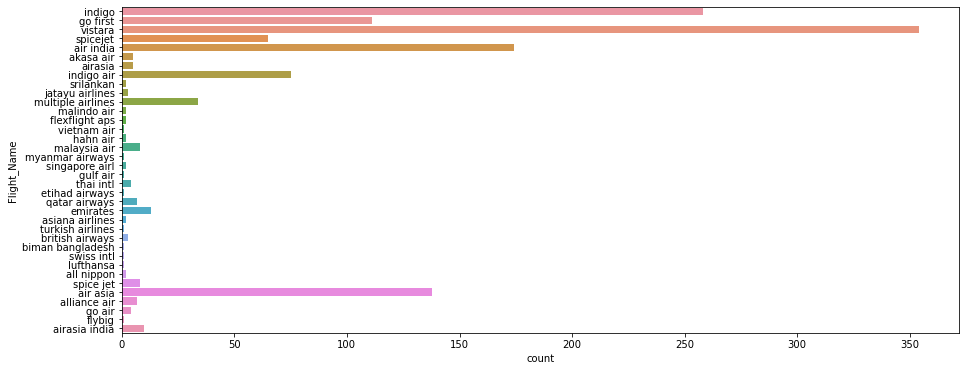

vistara              354
indigo               258
air india            174
air asia             138
go first             111
indigo air            75
spicejet              65
multiple airlines     34
emirates              13
airasia india         10
malaysia air           8
spice jet              8
alliance air           7
qatar airways          7
airasia                5
akasa air              5
go air                 4
thai intl              4
jatayu airlines        3
british airways        3
all nippon             2
malindo air            2
asiana airlines        2
srilankan              2
singapore airl         2
hahn air               2
flexflight aps         2
etihad airways         1
turkish airlines       1
biman bangladesh       1
swiss intl             1
lufthansa              1
myanmar airways        1
vietnam air            1
flybig                 1
gulf air               1
Name: Flight_Name, dtype: int64


In [43]:
#plot each class frequency
plt.figure(figsize =(15,6))
sns.countplot(y='Flight_Name',data=data)
plt.show()
print(data['Flight_Name'].value_counts())

From graph we can see that there are maximum peoples are travelled form vistara(260) and indigo(258) airlines.

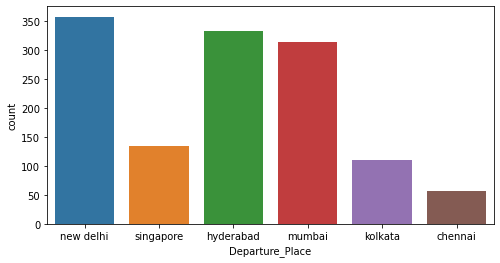

new delhi    358
hyderabad    334
mumbai       315
singapore    135
kolkata      110
chennai       57
Name: Departure_Place, dtype: int64


In [44]:
#plot each class frequency
plt.figure(figsize =(8,4))
sns.countplot(x='Departure_Place',data=data)
plt.show()
print(data['Departure_Place'].value_counts())

People are used Maximum time departure place as new delhi and hydrabad.

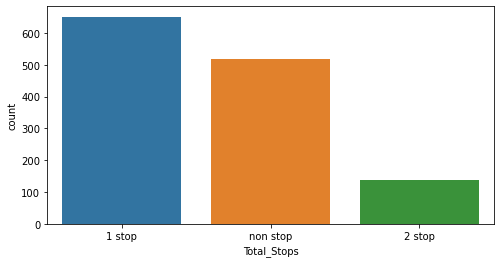

1 stop      651
non stop    519
2 stop      139
Name: Total_Stops, dtype: int64


In [45]:
#plot each class frequency
plt.figure(figsize =(8,4))
sns.countplot(x='Total_Stops',data=data)
plt.show()
print(data['Total_Stops'].value_counts())

There are maximum no of flight who have 1 stop.

<Figure size 576x288 with 0 Axes>

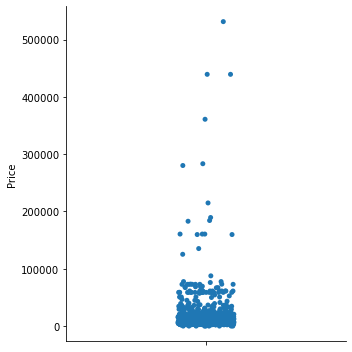

15078.0    38
4687.0     32
6507.0     26
58802.0    18
4765.0     17
           ..
23167.0     1
23113.0     1
23598.0     1
22223.0     1
3149.0      1
Name: Price, Length: 507, dtype: int64


In [46]:
#plot each class frequency
plt.figure(figsize =(8,4))
sns.catplot(y='Price',data=data)
plt.show()
print(data['Price'].value_counts())

Outliers are present in the target variable

# Bivariate Plot

<Figure size 720x432 with 0 Axes>

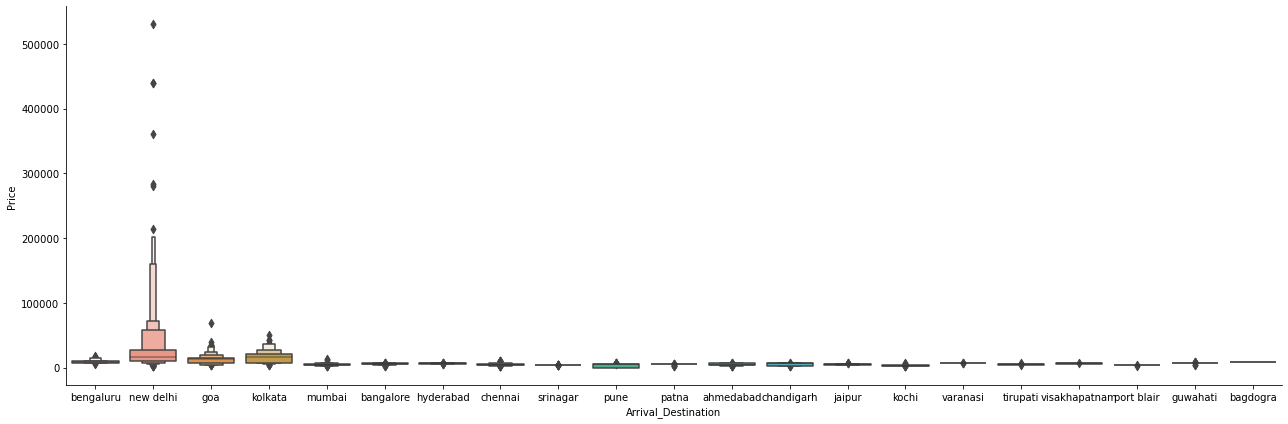

In [47]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='Arrival_Destination', y ='Price', data = data, kind = "boxen", height = 6, aspect = 3)
plt.show()

From graph we can see that the new delhi flight has maximum rate or price.

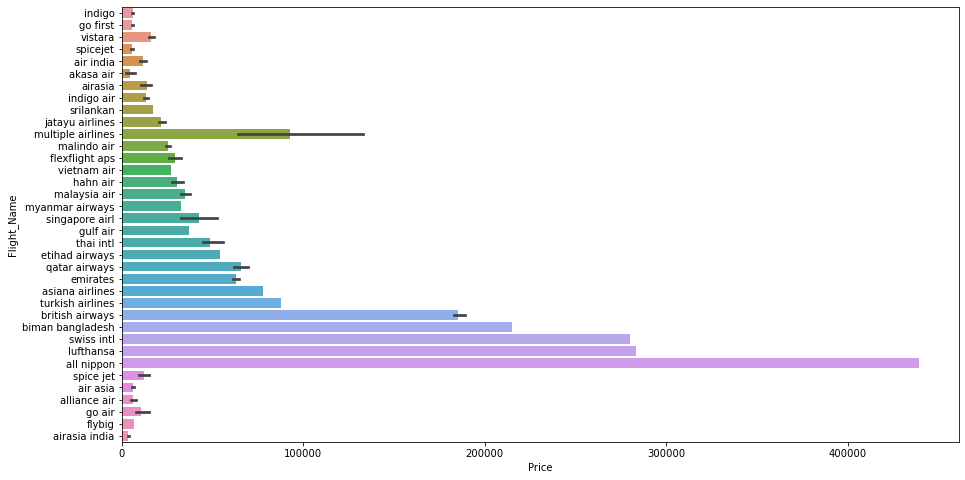

In [48]:
#Bivariant graph
plt.figure(figsize =(15,8))
sns.barplot(y ='Flight_Name', x ='Price', data = data)
plt.show()

From graph we can see the price for all nippon has very expensive flights and airasia, akasa air, indigo, gofirst airlines has cheap flights.

<Figure size 720x432 with 0 Axes>

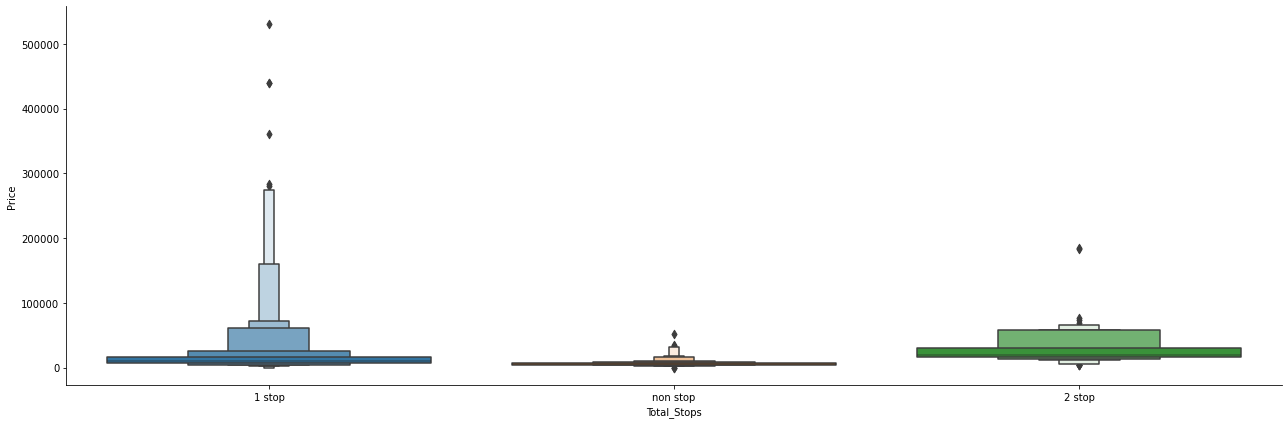

In [49]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='Total_Stops', y ='Price', data = data, kind = "boxen", height = 6, aspect = 3)
plt.show()

The price are high for the 1 stop flights

<Figure size 720x432 with 0 Axes>

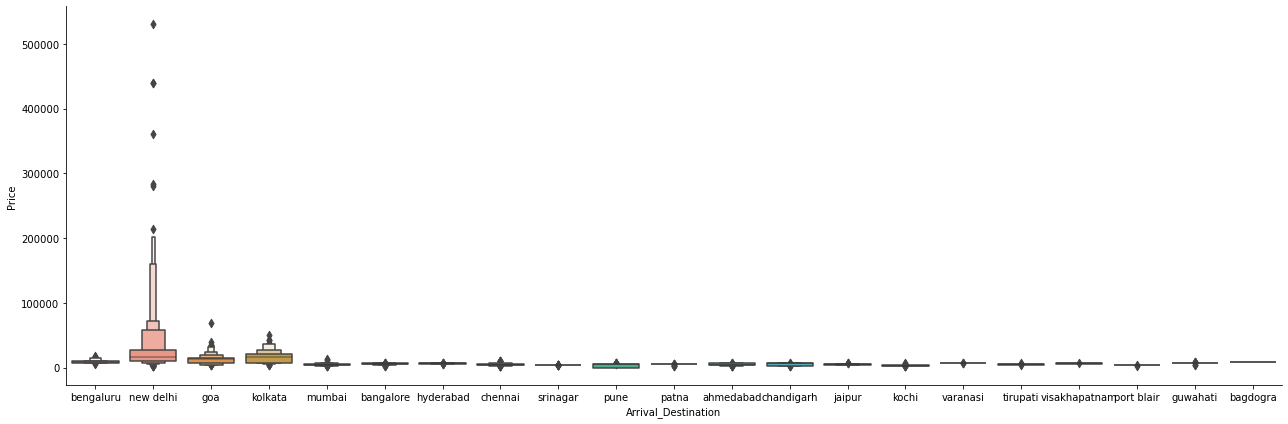

In [50]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='Arrival_Destination', y ='Price', data = data, kind = "boxen", height = 6, aspect = 3)
plt.show()

For the new delhi arival place has maximum price.

<Figure size 720x432 with 0 Axes>

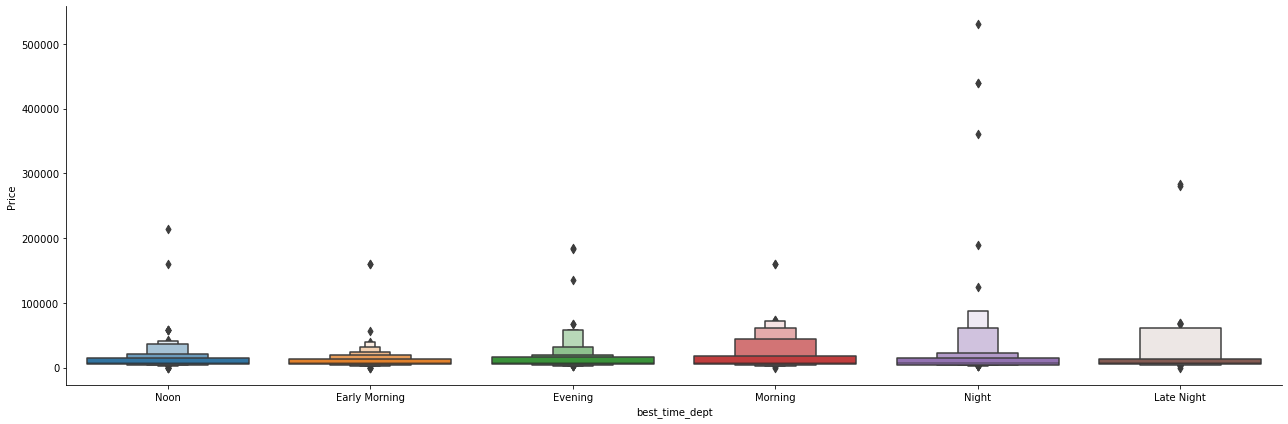

In [51]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='best_time_dept', y ='Price', data = data, kind = "boxen", height = 6, aspect = 3)
plt.show()

From graph we cam see that the prices are high for the night flights and cheap for the early morning flights. So the best time to buy the tickets for the early morning flights.

<Figure size 720x432 with 0 Axes>

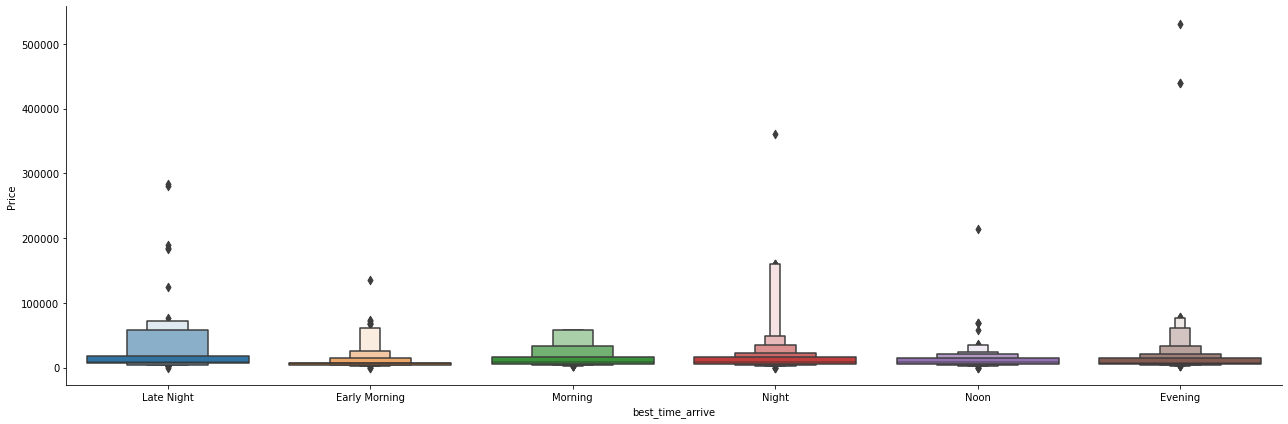

In [52]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='best_time_arrive', y ='Price', data = data, kind = "boxen", height = 6, aspect = 3)
plt.show()

From graph we can see that the best time for the arrival is Noon as flight charges for the noon flights are very cheap.

<Figure size 720x432 with 0 Axes>

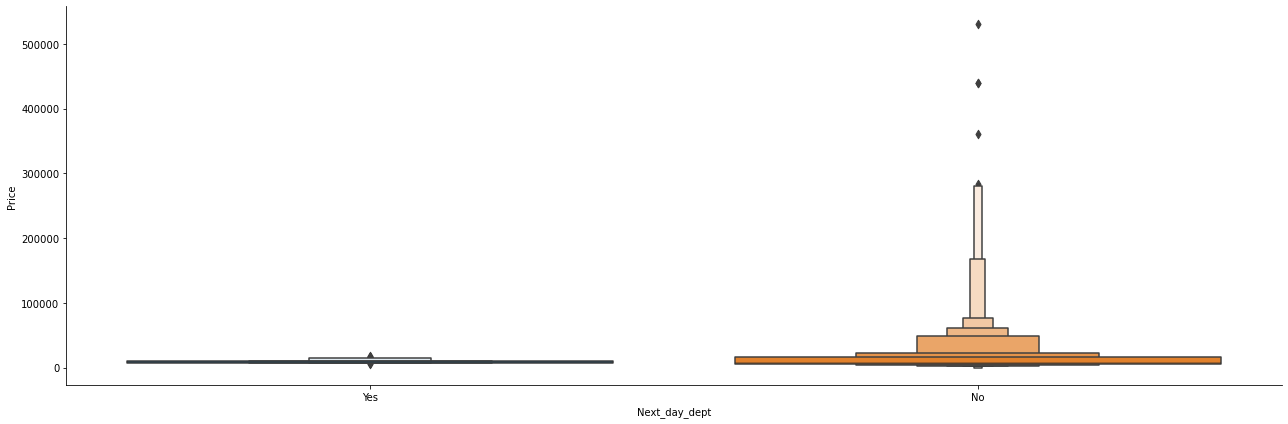

In [53]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='Next_day_dept', y ='Price', data = data, kind = "boxen", height = 6, aspect = 3)
plt.show()

From graph we can see that the prices are very low for the long route . 

<Figure size 720x432 with 0 Axes>

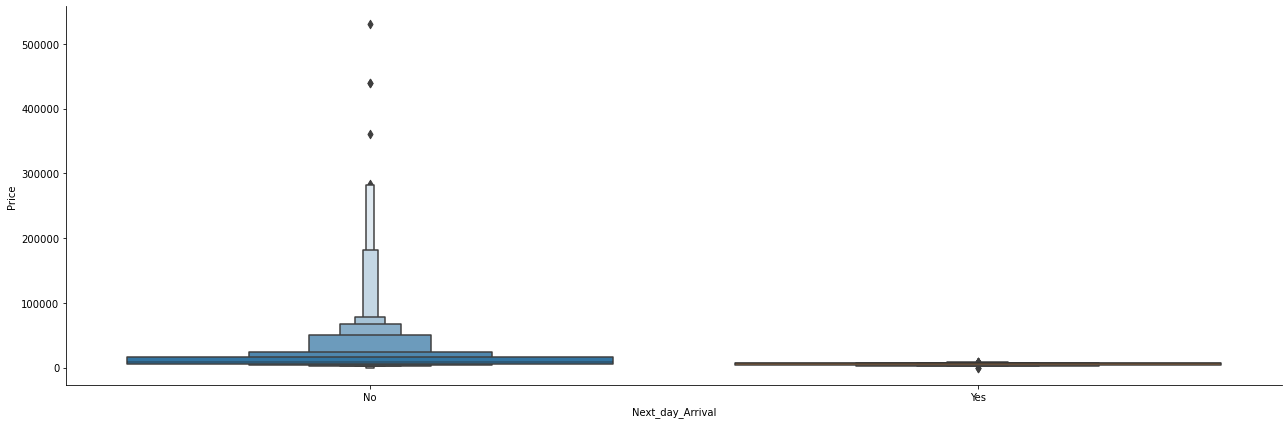

In [54]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='Next_day_Arrival', y ='Price', data = data, kind = "boxen", height = 6, aspect = 3)
plt.show()

From grapf we can see that the prices are very high for the next dat arrival flight means for the long journy. 

# Data Processesing

In [43]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['Flight_Name',
 'Departure_Place',
 'Arrival_Destination',
 'Total_Stops',
 'Next_day_Arrival',
 'Next_day_dept',
 'best_time_dept',
 'best_time_arrive']

As we have objective type data so lets deal with it by using encoding techniques and convert them into int.

In [44]:
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
for i in cat_col:
    df=label.fit_transform(data[i])
    pd.Series(df)
    data[i]=df

In [45]:
# Recheck the data after encoding into numerical values
data.head()

,Flight_Name,Departure_Place,Arrival_Destination,Total_Stops,Price,Dep_Time_hours,Dep_Time_minutes,Arv_Time_hours,Arv_Time_minutes,Next_day_Arrival,Next_day_dept,Duration_hours,Duration_minutes,best_time_dept,best_time_arrive
0,18,4,3,0,5988.0,15,10,0,5,0,1,8,55,5,2
1,15,4,3,2,7107.0,5,45,8,35,0,1,2,50,0,0
2,35,4,3,2,7184.0,5,35,8,30,0,1,2,55,0,0
3,18,4,3,0,7487.0,19,45,1,10,0,1,5,25,1,2
4,18,4,3,2,7499.0,5,55,8,45,0,1,2,50,0,0


In [46]:
print(data.shape)

(1309, 15)


In [47]:
data.columns

Index(['Flight_Name', 'Departure_Place', 'Arrival_Destination', 'Total_Stops',
       'Price', 'Dep_Time_hours', 'Dep_Time_minutes', 'Arv_Time_hours',
       'Arv_Time_minutes', 'Next_day_Arrival', 'Next_day_dept',
       'Duration_hours', 'Duration_minutes', 'best_time_dept',
       'best_time_arrive'],
      dtype='object')

# Multivarinate Plot 

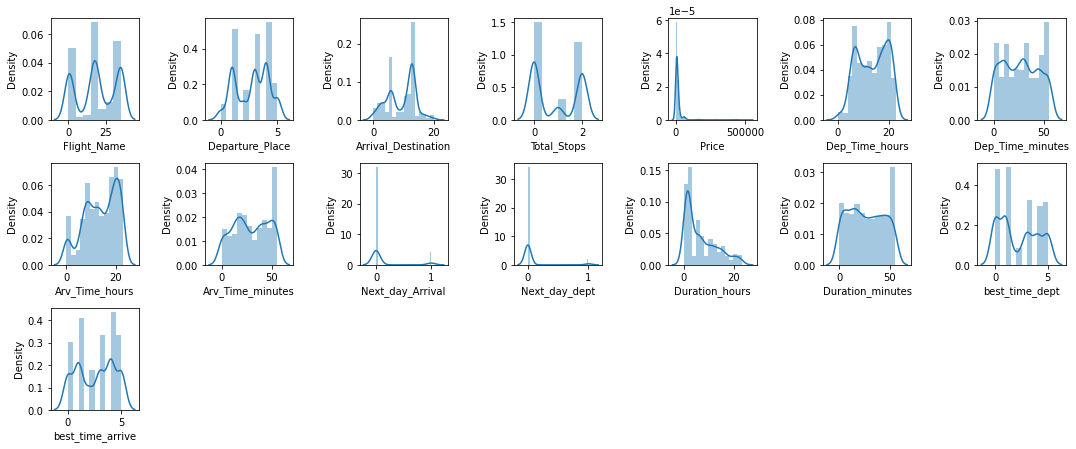

In [48]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=70:
        ax=plt.subplot(10,7,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From graph we can see that the data has skweness which we need to fix it.

In [49]:
# See again Statistical Summary
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,Flight_Name,Departure_Place,Arrival_Destination,Total_Stops,Price,Dep_Time_hours,Dep_Time_minutes,Arv_Time_hours,Arv_Time_minutes,Next_day_Arrival,Next_day_dept,Duration_hours,Duration_minutes,best_time_dept,best_time_arrive
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,18.730328,2.754775,9.341482,0.899160,15626.639801,13.477464,26.390374,13.878533,28.938121,0.114591,0.055004,6.723453,26.503438,2.209320,2.595111
std,12.899215,1.457419,4.614526,0.940382,32566.067558,5.932636,17.707259,6.643712,17.353008,0.318650,0.228075,6.202242,17.429878,1.830477,1.733685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,6.000000,0.000000,5083.000000,8.000000,10.000000,9.000000,15.000000,0.000000,0.000000,2.000000,10.000000,1.000000,1.000000
50%,18.000000,3.000000,11.000000,1.000000,7732.000000,14.000000,25.000000,14.000000,30.000000,0.000000,0.000000,5.000000,25.000000,2.000000,3.000000
75%,35.000000,4.000000,13.000000,2.000000,15188.000000,19.000000,40.000000,20.000000,45.000000,0.000000,0.000000,11.000000,40.000000,4.000000,4.000000
max,35.000000,5.000000,20.000000,2.000000,531226.000000,23.000000,55.000000,23.000000,55.000000,1.000000,1.000000,23.000000,55.000000,5.000000,5.000000


Observation:-1) Null values are treated well. 2)Diffrance between mean & std. 3)outliers and skwed data is present.

All null values are treated well now lets move further for the skewness & colinarity

From graph we can see that the almost every columns have skewness, now lets check with skew values also.

In [50]:
# Check skewness by skew value
data.skew().sort_values(ascending=False)

Price                  9.206161
Next_day_dept          3.908165
Next_day_Arrival       2.422713
Duration_hours         0.967808
best_time_dept         0.220955
Total_Stops            0.201889
Duration_minutes       0.080891
Dep_Time_minutes       0.079344
Arv_Time_minutes      -0.044757
best_time_arrive      -0.109289
Flight_Name           -0.130822
Dep_Time_hours        -0.150868
Departure_Place       -0.202769
Arrival_Destination   -0.296646
Arv_Time_hours        -0.423590
dtype: float64

As we seen in almost all columns we have skewness so lets deal with it.

Lets use advance tech. to remove this skewness using Power transformation

In [51]:
# Separate the skewed columns
df1=['Flight_Name', 'Departure_Place', 'Arrival_Destination', 'Total_Stops',
    'Dep_Time_hours','Arv_Time_hours',
       'Next_day_Arrival', 'Next_day_dept',
       'Duration_hours', 'best_time_dept',
       'best_time_arrive']

In [52]:
data.astype('int')

,Flight_Name,Departure_Place,Arrival_Destination,Total_Stops,Price,Dep_Time_hours,Dep_Time_minutes,Arv_Time_hours,Arv_Time_minutes,Next_day_Arrival,Next_day_dept,Duration_hours,Duration_minutes,best_time_dept,best_time_arrive
0,18,4,3,0,5988,15,10,0,5,0,1,8,55,5,2
1,15,4,3,2,7107,5,45,8,35,0,1,2,50,0,0
2,35,4,3,2,7184,5,35,8,30,0,1,2,55,0,0
3,18,4,3,0,7487,19,45,1,10,0,1,5,25,1,2
4,18,4,3,2,7499,5,55,8,45,0,1,2,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,4,0,12,2,2910,20,50,22,50,0,0,2,0,1,4
1305,18,0,12,2,2914,22,25,0,20,0,0,1,55,4,2
1306,3,0,12,0,3149,6,55,21,0,0,0,14,5,0,4
1307,18,0,12,2,3400,8,30,10,20,0,0,1,50,0,3


In [53]:
# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data[df1]=pt.fit_transform(data[df1].values)
data[df1] # rechek data

,Flight_Name,Departure_Place,Arrival_Destination,Total_Stops,Dep_Time_hours,Arv_Time_hours,Next_day_Arrival,Next_day_dept,Duration_hours,best_time_dept,best_time_arrive
0,0.090720,0.854729,-1.372627,-0.984382,0.270044,-2.012438,-0.359753,4.144943,0.606446,1.336564,-0.281317
1,-0.124240,0.854729,-1.372627,1.122251,-1.441945,-0.905655,-0.359753,4.144943,-0.712698,-1.375264,-1.573428
2,1.145304,0.854729,-1.372627,1.122251,-1.441945,-0.905655,-0.359753,4.144943,-0.712698,-1.375264,-1.573428
3,0.090720,0.854729,-1.372627,-0.984382,0.929187,-1.886230,-0.359753,4.144943,0.132818,-0.510047,-0.281317
4,0.090720,0.854729,-1.372627,1.122251,-1.441945,-0.905655,-0.359753,4.144943,-0.712698,-1.375264,-1.573428
...,...,...,...,...,...,...,...,...,...,...,...
1304,-1.079969,-1.889348,0.573466,1.122251,1.092411,1.246008,-0.359753,-0.241258,-0.712698,-0.510047,0.817123
1305,0.090720,-1.889348,0.573466,1.122251,1.417208,-2.012438,-0.359753,-0.241258,-1.229105,0.982205,-0.281317
1306,-1.192787,-1.889348,0.573466,-0.984382,-1.264624,1.087459,-0.359753,-0.241258,1.182027,-1.375264,0.817123
1307,0.090720,-1.889348,0.573466,1.122251,-0.915205,-0.609403,-0.359753,-0.241258,-1.229105,-1.375264,0.283228


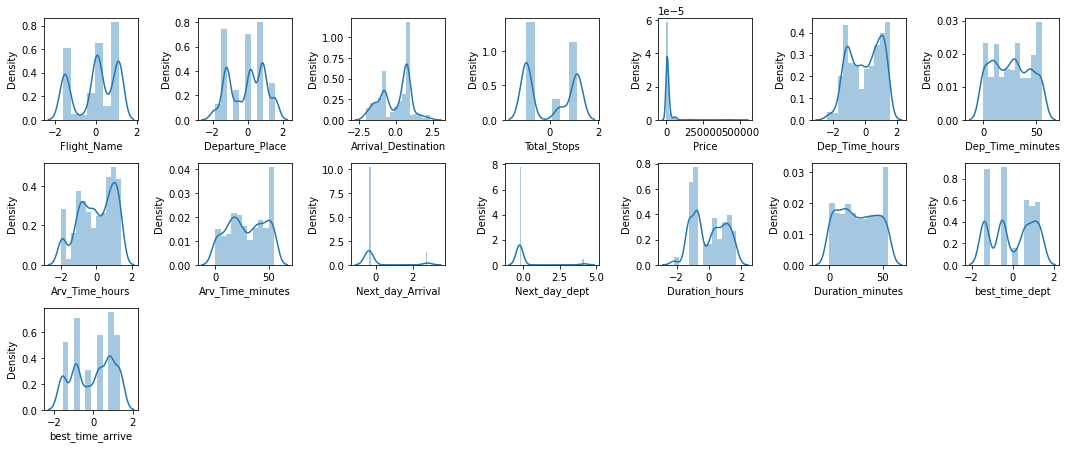

In [54]:
# distribusion after transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=70:
        ax=plt.subplot(10,7,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Lets Check Correlation

In [55]:
data.corr()

,Flight_Name,Departure_Place,Arrival_Destination,Total_Stops,Price,Dep_Time_hours,Dep_Time_minutes,Arv_Time_hours,Arv_Time_minutes,Next_day_Arrival,Next_day_dept,Duration_hours,Duration_minutes,best_time_dept,best_time_arrive
Flight_Name,1.000000,0.072899,0.070175,-0.068739,0.079939,-0.006579,0.059192,0.169084,0.096505,-0.100184,0.011704,0.102330,0.028003,-0.114059,0.148241
Departure_Place,0.072899,1.000000,-0.116255,0.029045,0.297260,0.058707,-0.005725,-0.006297,0.095341,-0.048197,0.206210,0.024753,0.058644,0.093114,-0.003124
Arrival_Destination,0.070175,-0.116255,1.000000,-0.214710,0.170904,-0.052079,-0.044268,0.017456,0.013461,-0.128225,-0.331157,0.153817,-0.149443,0.030029,0.033577
Total_Stops,-0.068739,0.029045,-0.214710,1.000000,-0.181044,-0.029405,-0.007314,0.010389,-0.009168,-0.239612,0.164868,-0.686875,-0.019329,-0.054072,-0.018557
Price,0.079939,0.297260,0.170904,-0.181044,1.000000,0.041171,-0.003567,-0.024322,-0.007065,-0.108400,-0.045291,0.130546,-0.053705,0.077213,0.003993
Dep_Time_hours,-0.006579,0.058707,-0.052079,-0.029405,0.041171,1.000000,0.023724,0.144882,0.042340,0.351824,-0.048036,0.050209,-0.018119,0.462222,0.035501
Dep_Time_minutes,0.059192,-0.005725,-0.044268,-0.007314,-0.003567,0.023724,1.000000,0.018211,-0.018642,0.078106,0.001873,0.027050,-0.014792,0.099779,-0.051506
Arv_Time_hours,0.169084,-0.006297,0.017456,0.010389,-0.024322,0.144882,0.018211,1.000000,0.036852,-0.338344,-0.015798,-0.014057,-0.025745,0.077572,0.367189
Arv_Time_minutes,0.096505,0.095341,0.013461,-0.009168,-0.007065,0.042340,-0.018642,0.036852,1.000000,-0.085822,-0.025797,0.037963,0.048784,-0.006719,0.025023
Next_day_Arrival,-0.100184,-0.048197,-0.128225,-0.239612,-0.108400,0.351824,0.078106,-0.338344,-0.085822,1.000000,-0.086793,0.218797,0.017824,0.154654,-0.242862


From above .corr method we can sse the correlation between independant variable and dependant variable. There are some +ve and -ve correlation with target variable of independant variable. Lets visualise the same by plotting the heatmap.

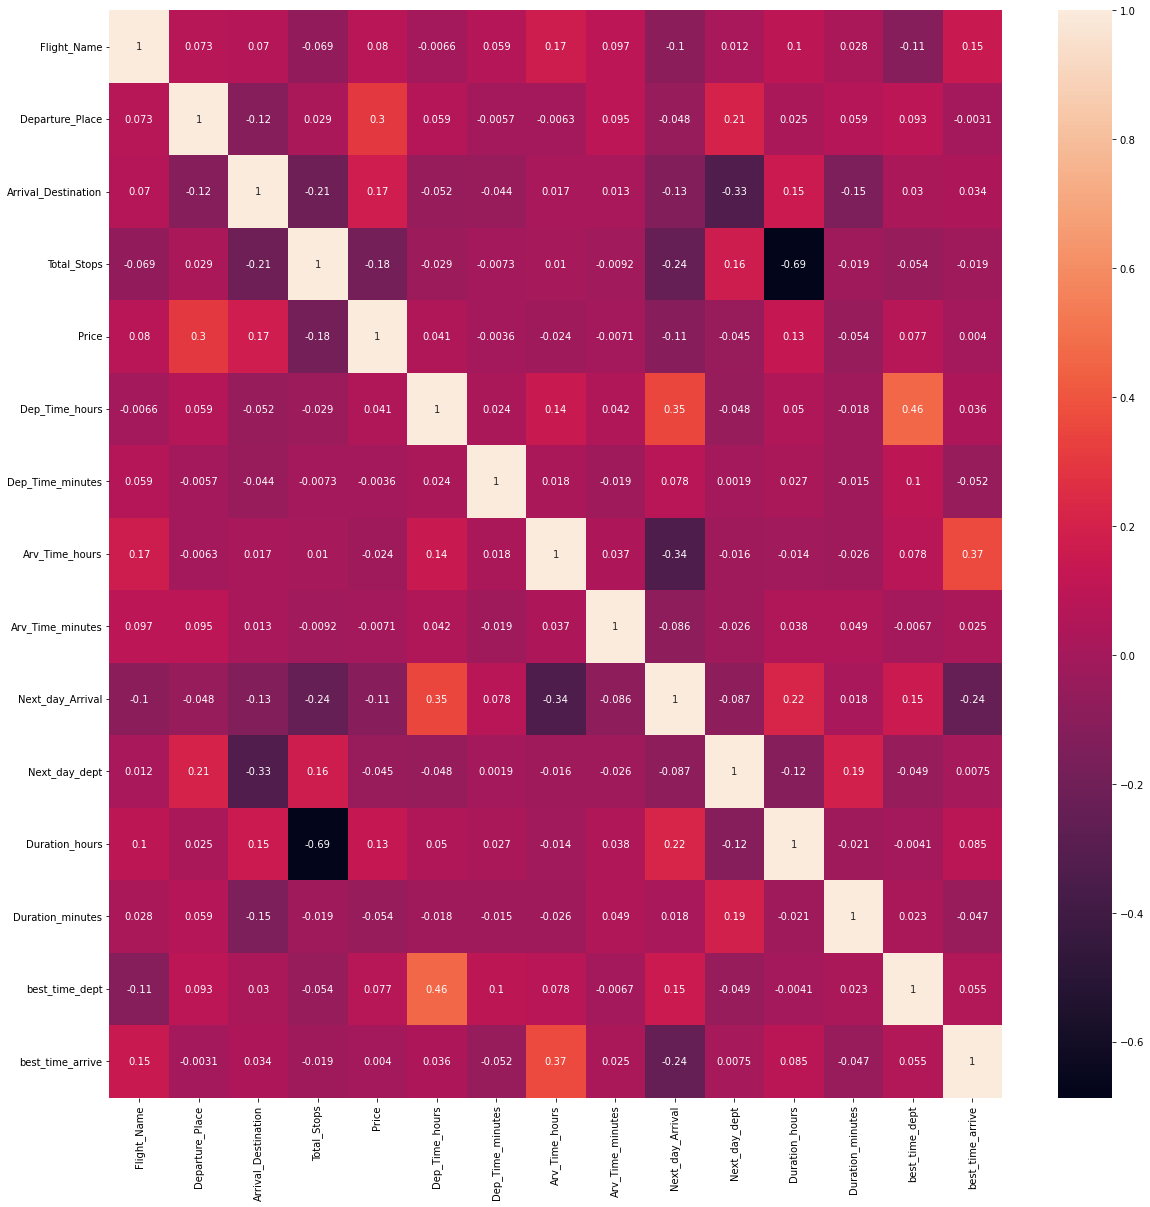

In [56]:
#check multicolinearity
my_fig1=plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [57]:
# Save graph 
plt.savefig('my_fig1.png')

<Figure size 432x288 with 0 Axes>

In [58]:
# Check correlation with target variable
data.corr()['Price'].sort_values(ascending = True)

Total_Stops           -0.181044
Next_day_Arrival      -0.108400
Duration_minutes      -0.053705
Next_day_dept         -0.045291
Arv_Time_hours        -0.024322
Arv_Time_minutes      -0.007065
Dep_Time_minutes      -0.003567
best_time_arrive       0.003993
Dep_Time_hours         0.041171
best_time_dept         0.077213
Flight_Name            0.079939
Duration_hours         0.130546
Arrival_Destination    0.170904
Departure_Place        0.297260
Price                  1.000000
Name: Price, dtype: float64

We can see almost every column is corelated with target variable except Arv_Time_hours.Lets move further to check the outliers.

In [59]:
data.shape

(1309, 15)

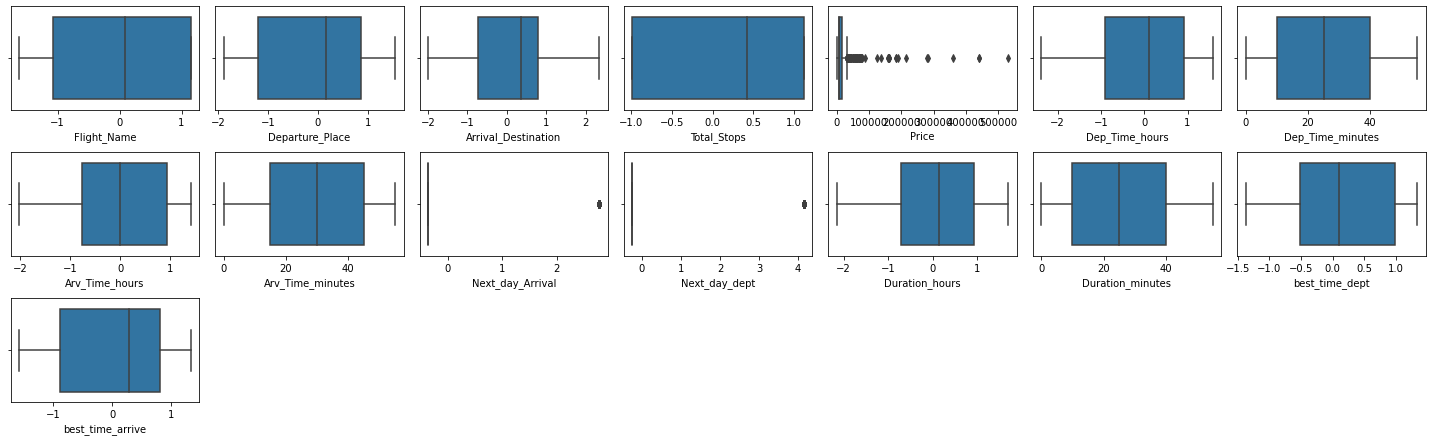

In [60]:
#Let's see the outliers in the dataset by using box plot or Graphical analysis of all features
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=70:
        ax=plt.subplot(10,7,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

No outliers are present in the dataset except target variable so lets divide dataset into target variable and local variables.

In [61]:
#As outliers present in target variable first remove it 
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)

Flight_Name              -1.079969
Departure_Place          -1.204453
Arrival_Destination      -0.731643
Total_Stops              -0.984382
Price                  5083.000000
Dep_Time_hours           -0.915205
Dep_Time_minutes         10.000000
Arv_Time_hours           -0.758150
Arv_Time_minutes         15.000000
Next_day_Arrival         -0.359753
Next_day_dept            -0.241258
Duration_hours           -0.712698
Duration_minutes         10.000000
best_time_dept           -0.510047
best_time_arrive         -0.889917
Name: 0.25, dtype: float64 Flight_Name                1.145304
Departure_Place            0.854729
Arrival_Destination        0.793053
Total_Stops                1.122251
Price                  15188.000000
Dep_Time_hours             0.929187
Dep_Time_minutes          40.000000
Arv_Time_hours             0.929513
Arv_Time_minutes          45.000000
Next_day_Arrival          -0.359753
Next_day_dept             -0.241258
Duration_hours             0.933441
Duration_minutes

In [62]:
Price_H=(q3.Price+(1.5*iqr.Price))
Price_H

30345.5

In [63]:
Index=np.where(data['Price']>Price_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 399, 401, 402, 513, 514, 515, 516, 517, 518, 519, 520,
       521, 522, 523, 607, 608, 609, 610, 611, 612, 613, 614], dtype=int64),)


(1194, 15)

In [64]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['Price'])
y=data['Price']

In [65]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [66]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

         vif              featurs
0   1.117918          Flight_Name
1   1.149211      Departure_Place
2   1.241129  Arrival_Destination
3   2.355180          Total_Stops
4   1.678028       Dep_Time_hours
5   1.037145     Dep_Time_minutes
6   1.458754       Arv_Time_hours
7   1.058424     Arv_Time_minutes
8   1.776611     Next_day_Arrival
9   1.234377        Next_day_dept
10  2.295298       Duration_hours
11  1.071683     Duration_minutes
12  1.389449       best_time_dept
13  1.234338     best_time_arrive


As we can see that pvalues of above predictors is  not more than 10 so there is no multicolinarity.

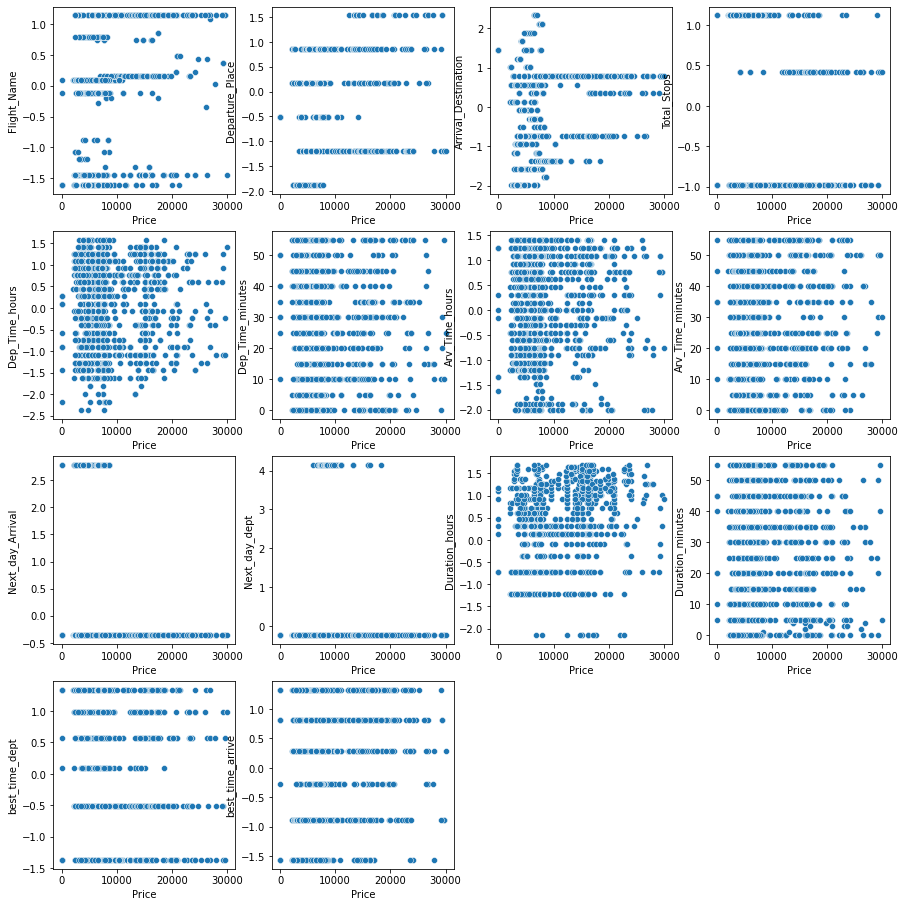

In [67]:
# see how featurs r related to lable(Graphical Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.scatterplot(y,x[column])
    plotnumber+=1
plt.show()

In [68]:
print(x.shape)
print(y.shape)

(1194, 14)
(1194,)


In [69]:
# Lets select the proper random state to build best model by using LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr= RandomForestRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {r2_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {r2_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.9620666311963266
at random sate 0, the testing accuracy is:- 0.7861717897755722


at random sate 1, the training accuracy is:- 0.9620213399501637
at random sate 1, the testing accuracy is:- 0.6435178004161536


at random sate 2, the training accuracy is:- 0.9580106265973355
at random sate 2, the testing accuracy is:- 0.786412909522261


at random sate 3, the training accuracy is:- 0.9643704942465469
at random sate 3, the testing accuracy is:- 0.7776481369085156


at random sate 4, the training accuracy is:- 0.9611490480374825
at random sate 4, the testing accuracy is:- 0.7595787427649037


at random sate 5, the training accuracy is:- 0.9608352969873571
at random sate 5, the testing accuracy is:- 0.7845129712335076


at random sate 6, the training accuracy is:- 0.9606833714360311
at random sate 6, the testing accuracy is:- 0.7858812437226602


at random sate 7, the training accuracy is:- 0.9632186866455158
at random sate 7, the testing accu

at random sate 63, the training accuracy is:- 0.9647806036459956
at random sate 63, the testing accuracy is:- 0.7697200877931281


at random sate 64, the training accuracy is:- 0.9622948624781398
at random sate 64, the testing accuracy is:- 0.7561797968726016


at random sate 65, the training accuracy is:- 0.9604261948646405
at random sate 65, the testing accuracy is:- 0.7169020598267415


at random sate 66, the training accuracy is:- 0.9647560241235572
at random sate 66, the testing accuracy is:- 0.7420265123448984


at random sate 67, the training accuracy is:- 0.9639568819992853
at random sate 67, the testing accuracy is:- 0.7121652288030542


at random sate 68, the training accuracy is:- 0.9611195672707734
at random sate 68, the testing accuracy is:- 0.7030071907344426


at random sate 69, the training accuracy is:- 0.9654016985561444
at random sate 69, the testing accuracy is:- 0.7732392170128004


at random sate 70, the training accuracy is:- 0.964572679916468
at random sate 70, 

In [70]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state= 16)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(835, 14)
(359, 14)
(835,)
(359,)


# Now lets build the model for Flight Price Prediction

In [71]:
R2Score=[]
Acc=[]

In [72]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",r2_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",r2_score(y_test,pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
        print("MAE:",mean_absolute_error(y_test,pred))
        print("MSE:",mean_squared_error(y_test,pred))
        R2Score.append(r2_score(y_test,pred))

In [73]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    Acc.append(accuracies.mean()*100)

In [74]:
# Model no.1
from sklearn.ensemble import RandomForestRegressor

rand_regressor= RandomForestRegressor()
rand_regressor.fit(x_train,y_train)

print_score(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_regressor)


Train Report: 0.9596329386982838
Test Report: 0.7838166901399048
RMSE: 2701.214644294926
MAE: 1644.5818399323518
MSE: 7296560.554553364
Accuracy: 68.29 %
Standard Deviation: 3.49 %


In [75]:
# Model no.2
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9949686059032344
Test Report: 0.8013663422243849
RMSE: 2589.252681375356
MAE: 1664.0052920370713
MSE: 6704229.448009471
Accuracy: 68.50 %
Standard Deviation: 4.56 %


In [76]:
#Model no.3
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor()

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.8203658333943613
Test Report: 0.7326150467820208
RMSE: 3004.114605189906
MAE: 2034.4768729731236
MSE: 9024704.561115304
Accuracy: 68.86 %
Standard Deviation: 2.00 %


In [77]:
#Model no.4
from sklearn.ensemble import BaggingRegressor

bb=BaggingRegressor()

bb.fit(x_train,y_train)

print_score(bb,x_train,x_test,y_train,y_test,train=True)
print_score(bb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9428511454892612
Test Report: 0.7449671425664617
RMSE: 2933.905241798947
MAE: 1780.9245539859396
MSE: 8607799.967855336
Accuracy: 66.43 %
Standard Deviation: 4.34 %


In [78]:
# Model no.5
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test,train=True)
print_score(ada,x_train,x_test,y_train,y_test,train=False)
model_accuracy(ada)

Train Report: 0.5480322275960582
Test Report: 0.549082721394934
RMSE: 3901.1841697373848
MAE: 3025.781610843986
MSE: 15219237.926209569
Accuracy: 49.95 %
Standard Deviation: 1.93 %


In [79]:
#Model no.6
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test,train=True)
print_score(dt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(dt)

Train Report: 0.9957458329436698
Test Report: 0.5554932977443123
RMSE: 3873.353829509949
MAE: 2104.1643454039
MSE: 15002869.888579387
Accuracy: 46.56 %
Standard Deviation: 3.59 %


In [80]:
final=pd.DataFrame({'R2Score':R2Score,'Acc':Acc})
final

,R2Score,Acc
0,0.783817,68.287147
1,0.801366,68.497670
2,0.732615,68.863926
3,0.744967,66.433018
4,0.549083,49.949307
5,0.555493,46.564332


# Selecting GradiantBoostingRegressor with 68.86 % accuracy.

# HyperTunning Parameter

In [81]:
# Hyper tuning by using GridSearchCV
from sklearn.model_selection import GridSearchCV

para={'max_features':range(0,12,2),'min_samples_split':[4,5,9],'n_estimators':range(10,100,10),'max_depth':range(2,10,2)}
grid=GridSearchCV(estimator=gbdt, param_grid=para,cv=2)
grid.fit(x_train,y_train)

grid.best_params_

{'max_depth': 6, 'max_features': 6, 'min_samples_split': 5, 'n_estimators': 70}

In [96]:
#Model no.3
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor(max_depth=6, max_features= 6, min_samples_split= 5, n_estimators= 70)

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.9534383917408956
Test Report: 0.7914446868844367
RMSE: 2653.1306928412246
MAE: 1691.6270089401876
MSE: 7039102.473296156
Accuracy: 71.30 %
Standard Deviation: 4.14 %


In [88]:
# Hyper tuning by using RandomizedSearchCV With Bagging
from sklearn.model_selection import RandomizedSearchCV

para={'max_features':range(0,12,2),'min_samples_split':[4,5,9],'n_estimators':range(10,100,10),'max_depth':range(2,10,2)}
rand=RandomizedSearchCV(estimator=gbdt, cv=10,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'n_estimators': 90,
 'min_samples_split': 9,
 'max_features': 10,
 'max_depth': 8}

In [93]:
#Model no.3
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor(max_depth=8, max_features= 10, min_samples_split= 9, n_estimators= 90)

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.9930641811468328
Test Report: 0.8147542335689555
RMSE: 2500.472947941885
MAE: 1527.6161398939205
MSE: 6252364.963389181
Accuracy: 70.10 %
Standard Deviation: 2.83 %


# After hypertuning i m selecting GradientBoostingRegressor with GridSearchCV with kfold cross validation with accuracy  71.30 %.

In [97]:
#save model
import pickle
Filename='Finalized_model_Flight_PriceGBDT1.pickle'
pickle.dump(gbdt,open(Filename,'wb'))

In [98]:
#serialization using joblib
import joblib
joblib.dump(gbdt,'Finalized_model_Flight_PriceGBDT1.obj')

['Finalized_model_Flight_PriceGBDT1.obj']

In [99]:
F_P= joblib.load('Finalized_model_Flight_PriceGBDT1.obj')

In [100]:
s_pred = F_P.predict(x_test)

In [101]:
r2_score(y_test,s_pred)

0.7914446868844367

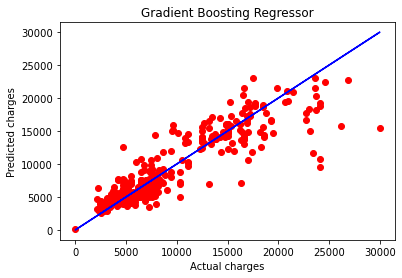

In [102]:
#lets plot y_test vs predicted 

plt.figure(figsize=(6,4))
plt.scatter(x = y_test,y = s_pred,color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Gradient Boosting Regressor')
plt.show()

In [103]:
#lets make a dataframe of actual answers vs predicted answers
conclusion = pd.DataFrame((F_P.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,349,350,351,352,353,354,355,356,357,358
Predicted,4448.58675,5560.126209,13825.607851,7086.07206,6468.823212,7146.662166,14831.850047,14170.666085,5292.221038,7252.138248,...,5006.967449,6969.473917,17519.289138,5788.753597,4240.407199,3901.330124,4957.609174,8532.056835,7126.318039,5669.572883
Actual,2545.00000,3725.000000,13717.000000,6507.00000,6507.000000,7872.000000,14530.000000,14714.000000,6367.000000,8506.000000,...,7605.000000,5455.000000,17190.000000,3850.000000,5852.000000,3400.000000,7222.000000,8042.000000,6472.000000,7605.000000
